# BANKING FRAUD DETECTION SYSTEM

### GROUP-19
### GROUP MEMBERS:
### Advaith Dev Krishnan -AM.EN.U4CSE20003 
### Divya Bisht        -AM.EN.U4CSE20021 
### Hari Chandan        -AM.EN.U4CSE20034
### Likhith Reddy         -AM.EN.U4CSE20039 
### Rithwik Sai        -AM.EN.U4CSE20057

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# loading the dataset to a pandas dataframe
credit_card_data = pd.read_csv("C:/Users/haric/(S-5)/-Courses/data science/DS project/creditcard.csv")

In [3]:
# first five rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#last five rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# some info about the data
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Distribution of legit transaction and fraudulent transaction 
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Dataset is highly unbalanced

0--> Normal Transaction

1-->Fraudulent Transaction


In [8]:
#separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [9]:
legit.shape

(284315, 31)

In [10]:
fraud.shape

(492, 31)

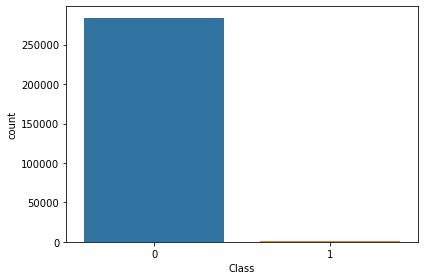

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax=plt.subplots(figsize=(6, 4))
ax=sns.countplot(x='Class', data=credit_card_data)
plt.tight_layout()

In [12]:
#statistical measures of the data for each type of class.
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
# compare the values for both transaction
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling to resolve the problem of unbalanced dataset

Build a sample dataset containg similar distribution of normal transaction and Fradulent Transaction


we would randomly take 492 data from legit dataset and we would take the fraud dataset completely and then use them to train the model


Number of Fraudulent Transaction = 492


In [15]:
legit_sample = legit.sample(n=492)

Concatenating two Dataframes using 'concat' function.

In [16]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)

In [17]:
# first five rows of the dataset
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
175419,122326.0,1.904189,-2.293103,0.536642,-1.084361,-2.519515,0.351370,-2.120080,0.184548,-0.005628,...,0.095606,0.758556,0.185335,1.190847,-0.482347,-0.100741,0.078894,0.009119,149.00,0
102480,68223.0,1.267587,-1.239658,1.237527,-0.185335,-1.672239,0.714411,-1.468933,0.295763,0.879178,...,-0.589173,-0.826024,-0.051753,-0.385347,0.232899,1.123897,0.016797,0.017455,40.00,0
72754,54843.0,0.931079,-0.459000,0.791979,1.647148,-0.783592,0.280818,-0.363281,0.237889,1.099496,...,-0.044913,-0.052294,-0.136648,0.071503,0.525018,-0.263152,0.044491,0.036084,104.80,0
35505,38149.0,1.353095,-0.636890,1.123782,-0.361180,-1.549740,-0.692385,-0.929487,-0.111127,-0.270067,...,0.300547,1.073061,-0.116295,0.804290,0.590259,-0.026245,0.049741,0.023660,4.22,0
172180,120989.0,1.894373,-0.699350,-0.525451,0.178599,-0.222369,0.903459,-0.917617,0.308664,1.082128,...,0.035724,0.068866,0.152496,-0.335420,-0.420142,0.174104,-0.011376,-0.037144,66.90,0


In [18]:
#last five rows of  the dataset
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


 Checking whether class types are equal or not.

In [19]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [20]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98624.640244,0.021058,-0.169520,-0.019472,-0.026145,-0.118255,-0.004446,0.030942,0.100047,-0.065443,...,0.039223,0.017310,0.063447,-0.046293,-0.039738,-0.004451,0.010680,0.026410,-0.006088,116.137480
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [21]:
# Correlation
# Correlation is useful to find peers of input field so we are aware when building models, either to transform them (principal component) or remove one of the two.

# In this particular data, it is told that all the V-variables are already principal components. So correlation is not useful to inspect the data. It can be verified below to see correlation coefficient of 0 for those V-variables.

# But one thing we can do is to find some correlation between V-variables and Class. Recall now that coding Class into a integer data type would be useful.

# code for correlation

new_dataset.corr()

# Splitting the data into features and target variable
X = new_dataset.drop(columns='Class',axis=1)
Y = new_dataset['Class']

print(X)


            Time        V1        V2        V3        V4        V5        V6  \
175419  122326.0  1.904189 -2.293103  0.536642 -1.084361 -2.519515  0.351370   
102480   68223.0  1.267587 -1.239658  1.237527 -0.185335 -1.672239  0.714411   
72754    54843.0  0.931079 -0.459000  0.791979  1.647148 -0.783592  0.280818   
35505    38149.0  1.353095 -0.636890  1.123782 -0.361180 -1.549740 -0.692385   
172180  120989.0  1.894373 -0.699350 -0.525451  0.178599 -0.222369  0.903459   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

We used the matplotlib and seaborn libraries to create a plot visualizing the correlation between the features of a dataset.

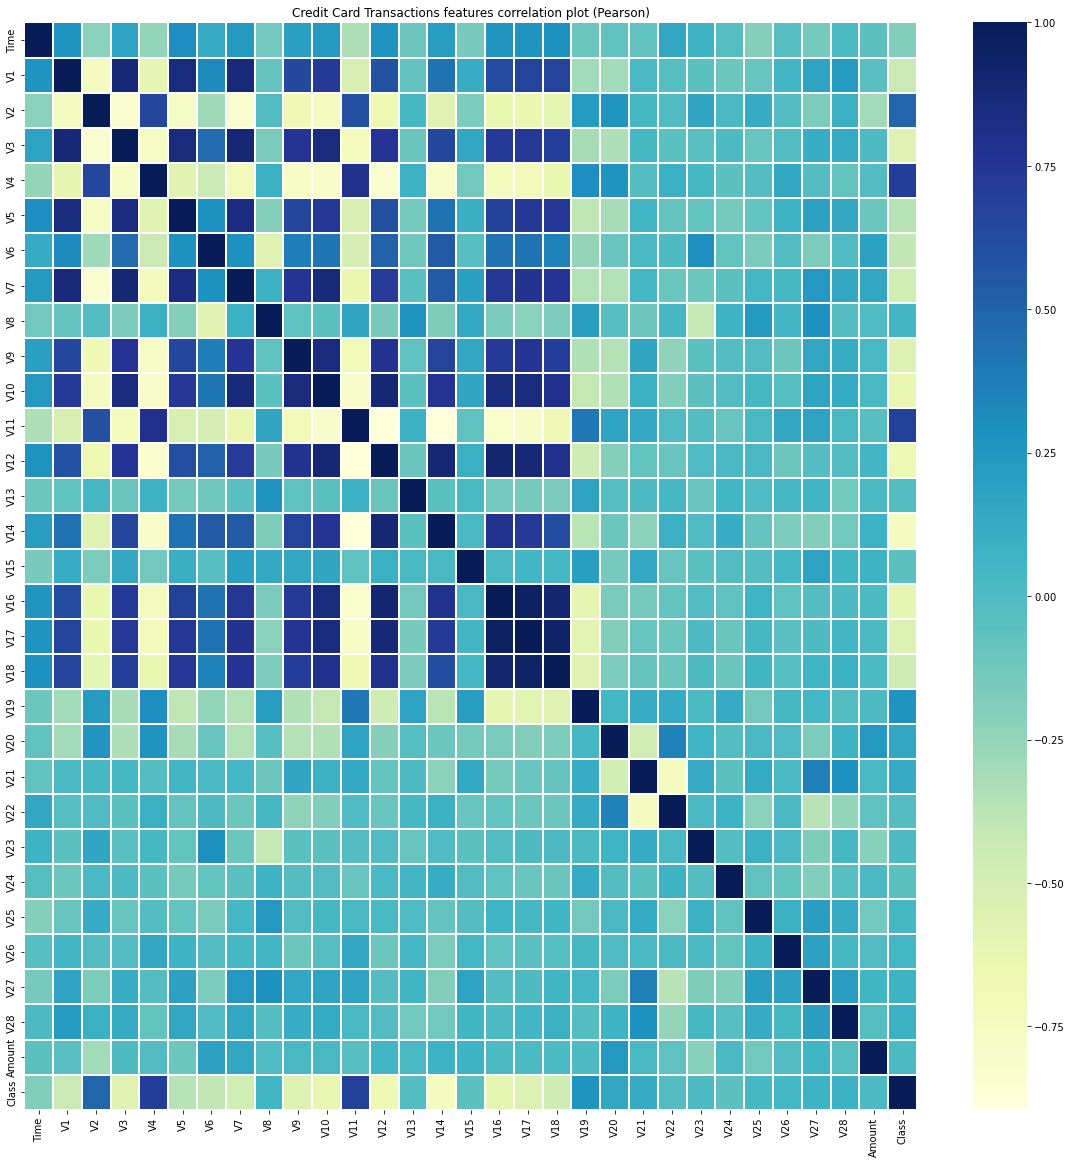

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = new_dataset.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="YlGnBu")
plt.show()


Splitting the data into features and targets

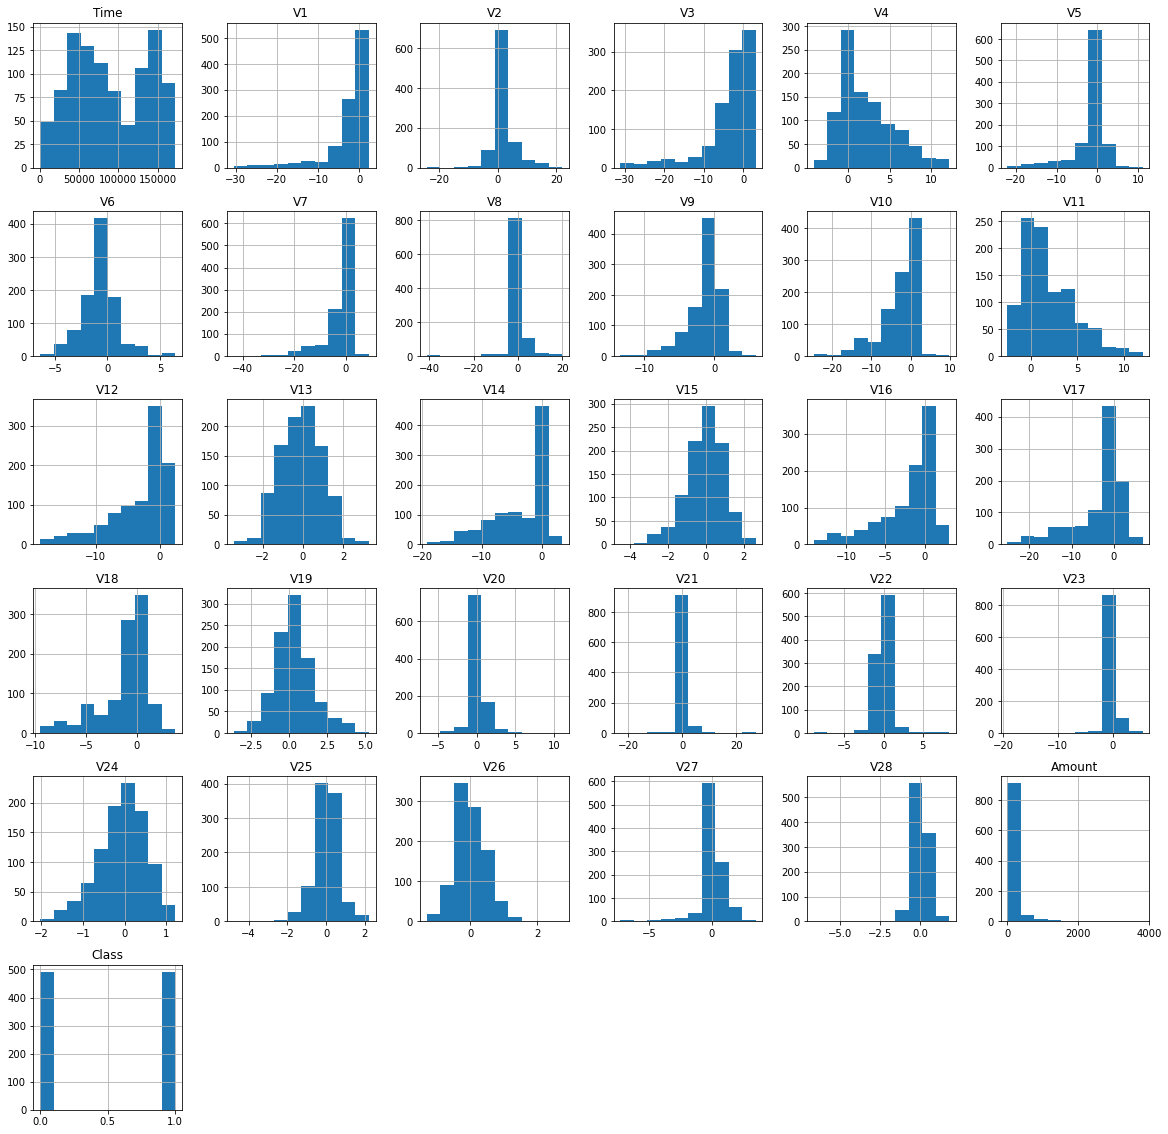

In [23]:
# Histogram for all the variables
new_dataset.hist(figsize = (20, 20))
plt.show()


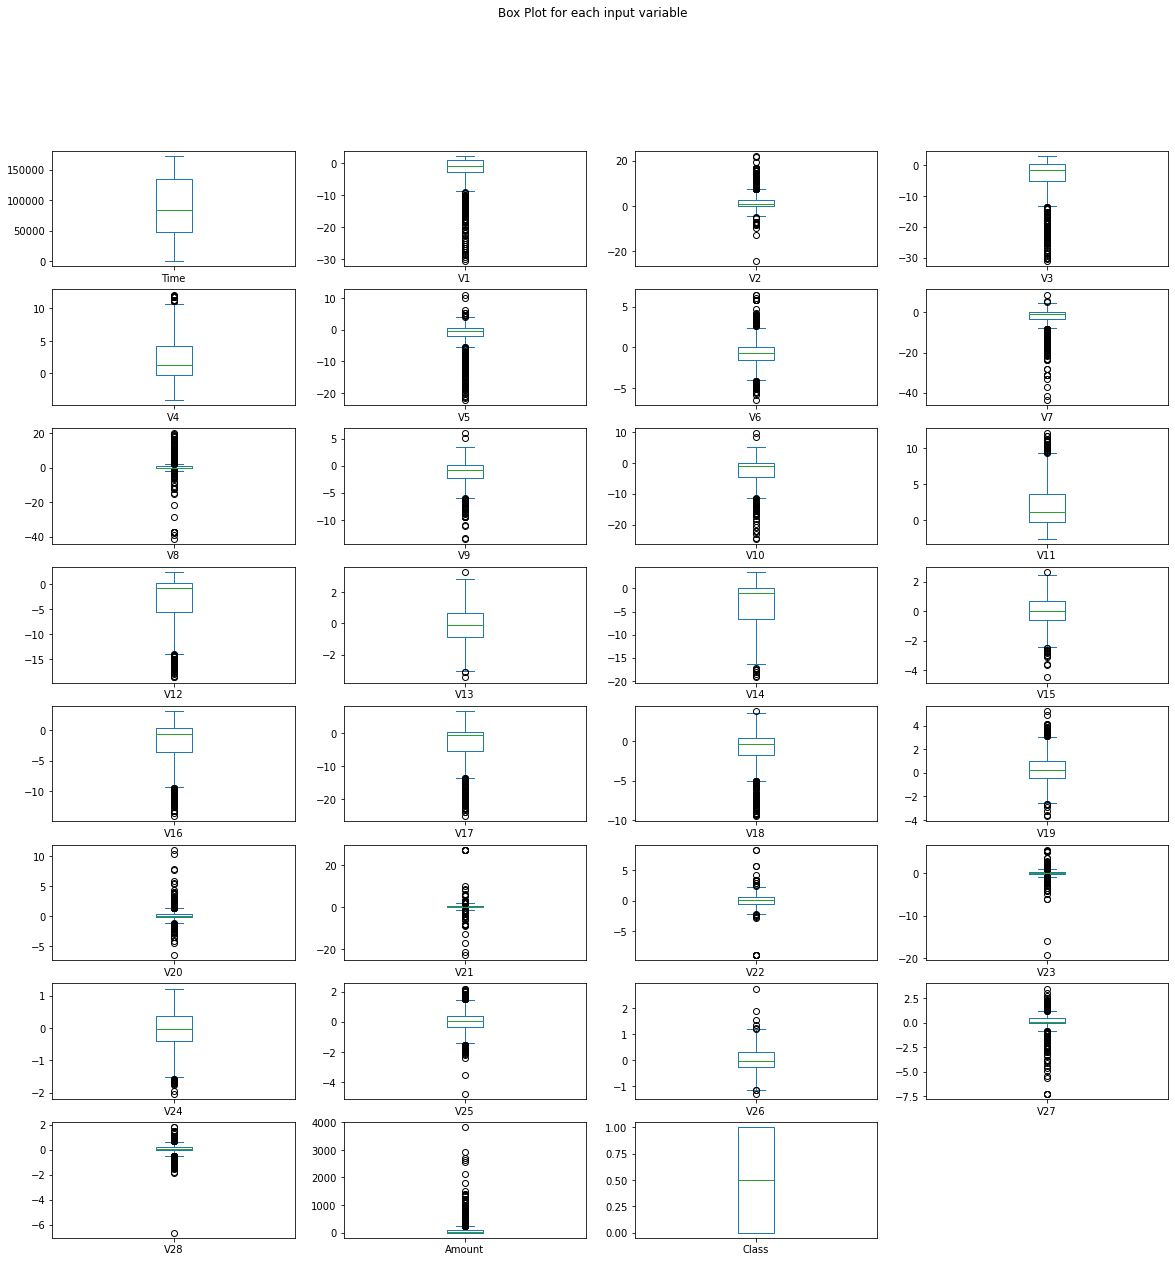

In [24]:
# box plot for all the variables
new_dataset.plot(kind='box', subplots=True, layout=(8,4), sharex=False, sharey=False, figsize=(20,20), title='Box Plot for each input variable')
plt.savefig('creditcard_box')
plt.show()

In [25]:
# Prepare train, validation, test dataset

# Splitting the data into training and testing data

X = new_dataset.drop(columns = 'Class',axis =1)
Y = new_dataset['Class']

In [26]:
## normalize numeric variables
## We have divided the dataset into 80% training data and 20% testing data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print('X_train shape: ', X_train.shape)

print('X_test shape: ', X_test.shape)

print('Y_train shape: ', Y_train.shape)

print('Y_test shape: ', Y_test.shape)


X_train shape:  (787, 30)
X_test shape:  (197, 30)
Y_train shape:  (787,)
Y_test shape:  (197,)


In [27]:
print(X)

[[ 0.68165512  0.76921101 -1.04665106 ... -0.01953563 -0.05566224
   0.09904312]
 [-0.44822462  0.65478969 -0.77239099 ... -0.08143441 -0.03758689
  -0.26291775]
 [-0.72765073  0.59430666 -0.56914986 ... -0.05382906  0.00280642
  -0.04773367]
 ...
 [ 1.66371886  0.30542848 -0.15640623 ...  0.2856989   0.34600107
  -0.13709484]
 [ 1.67656244 -0.13271579 -0.29712368 ...  0.78386953 -0.62553503
   0.41783435]
 [ 1.68454008  0.78498965 -0.40839246 ... -0.09519956 -0.10862876
  -0.25451628]]


In [28]:
print(Y)

175419    0
102480    0
72754     0
35505     0
172180    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Splitting the data into training data and test data



In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y, random_state=3)

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


In [31]:
# SVM model

from sklearn import svm
svm_model = svm.SVC(kernel='linear')

# training the Support Vector Machine model with the training data
svm_model.fit(X_train,Y_train)

#accuracy on training data
X_train_prediction = svm_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

print('Accuracy on Training data : ',training_data_accuracy*100)

#accuracy on test data
X_test_prediction = svm_model.predict(X_test)

test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

print('Accuracy on Test data : ',test_data_accuracy*100)



Accuracy on Training data :  94.53621346886912
Accuracy on Test data :  94.9238578680203
